# Prueba Intertrimestral

Nombre y Apellidos: Ignacio Núñez Gómez

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [36]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from scipy import stats

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [1]:
def mapa_logistico(r, x_n):
    return r * x_n * (1 - x_n)

# Ejemplo de uso:
r = 3.5  # Tasa de crecimiento
x_n = 0.5  # Valor de la iteración anterior

# Calcular la siguiente iteración
x_n1 = mapa_logistico(r, x_n)
print(x_n1)


0.875


b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [2]:
def iteraciones_mapa_logistico(r, x0, n):
    # Inicializa la lista con el valor inicial x0
    iteraciones = [x0]
    
    for _ in range(1, n):
        # Usa la función mapa_logistico para obtener el siguiente valor
        x_n = mapa_logistico(r, iteraciones[-1])
        iteraciones.append(x_n)
    
    return iteraciones

# Ejemplo de uso:
r = 3.5  
x0 = 0.5  
n = 10 

# Generar las primeras n iteraciones
resultado = iteraciones_mapa_logistico(r, x0, n)
print(resultado)


[0.5, 0.875, 0.3828125, 0.826934814453125, 0.5008976948447526, 0.87499717950388, 0.3828199037744718, 0.826940887670016, 0.500883795893397, 0.8749972661668659]


c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [13]:
def iteraciones_mapa_logistico(r, x0, n):
    iteraciones = [x0]
    for _ in range(1, n):
        x_n = mapa_logistico(r, iteraciones[-1])
        iteraciones.append(x_n)
    return iteraciones

x0 = 0.2  # Semilla 
n_iteraciones = 10  # Número de iteraciones que queremos

valores_r = np.arange(0.25, 4.25, 0.25)

# Inicializamos una lista para almacenar los resultados
datos = []

for r in valores_r:
    iteraciones = iteraciones_mapa_logistico(r, x0, n_iteraciones)

    for n, x_n1 in enumerate(iteraciones):
        datos.append([r, n, x_n1])
# Convertimos la lista en un DataFrame
df = pd.DataFrame(datos, columns=['r', 'n', 'x_{n+1}'])

# Mostrar los primeros 10 resultados
print(df.head(10))


      r  n       x_{n+1}
0  0.25  0  2.000000e-01
1  0.25  1  4.000000e-02
2  0.25  2  9.600000e-03
3  0.25  3  2.376960e-03
4  0.25  4  5.928275e-04
5  0.25  5  1.481190e-04
6  0.25  6  3.702427e-05
7  0.25  7  9.255725e-06
8  0.25  8  2.313910e-06
9  0.25  9  5.784761e-07


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

Iteraciones: [0.2, 0.56, 0.8623999999999999, 0.4153318400000001, 0.8499095593877504, 0.4464715508717464, 0.8649714679687339, 0.408785396490616, 0.8458796363731905, 0.4562854699982232]
Tercera iteración: 0.8623999999999999


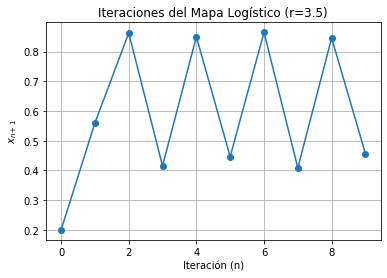

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

class MapaLogistico: 
    def __init__(self, r, x0):
        self.r = r
        self.x0 = x0
        self.iteraciones = [x0]  # Lista para almacenar las iteraciones
    
    def calcular_iteracion(self, x_n):
        return self.r * x_n * (1 - x_n)

    def generar_iteraciones(self, n):
        self.iteraciones = [self.x0]  
        for _ in range(1, n):
            x_n = self.calcular_iteracion(self.iteraciones[-1])
            self.iteraciones.append(x_n)
        return self.iteraciones
    
    def obtener_iteracion(self, n):
        if len(self.iteraciones) < n:
            raise ValueError("Aún no se han generado suficientes iteraciones.")
        return self.iteraciones[n-1]
    
    def graficar_iteraciones(self, n):
        # Generar las iteraciones 
        if len(self.iteraciones) < n:
            self.generar_iteraciones(n)
        
        # Crear el gráfico
        plt.plot(range(n), self.iteraciones, marker='o')
        plt.title(f"Iteraciones del Mapa Logístico (r={self.r})")
        plt.xlabel("Iteración (n)")
        plt.ylabel("$x_{n+1}$")
        plt.grid(True)
        plt.show()

# Ejemplo 
r = 3.5  
x0 = 0.2  

mapa = MapaLogistico(r, x0)

# Generar las primeras 10 iteraciones
iteraciones = mapa.generar_iteraciones(10)
print("Iteraciones:", iteraciones)

print("Tercera iteración:", mapa.obtener_iteracion(3))

mapa.graficar_iteraciones(10)


# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [29]:
file="C:\\Users\\ignac\\Downloads\\Walmart.csv"

df = pd.read_csv(file)
print(df.head())
print(df.shape)
print(df.isna().sum())
print(df.dtypes)
print(df.describe(include='all'))


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
(6435, 8)
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float6

Respustas:
Hay 1 NA en unemployment, que se elimina de la siguiente manera:


In [57]:
df = df.dropna(subset=['Unemployment'])

print("\nDataFrame después de eliminar filas con 'Unemployment' NaN:")
print(df)

print(df.head())
print(df.isna().sum())



DataFrame después de eliminar filas con 'Unemployment' NaN:
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
5         1 2010-12-03    1439541.59             0        57.79       2.667   
6         1 2010-03-19    1472515.79             0        54.58       2.720   
7         1 2010-03-26    1404429.92             0        51.45       2.732   
8         1 2010-02-04    1594968.28             0        62.27       2.719   
9         1 2010-09-04    1545418.53             0        65.86       2.770   
10        1 2010-04-16    1466058.28             0        66.32       

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



Número de tiendas: 45
Tienda con ventas promedio más altas: 20.0 con 2107676.8703496507
Tienda con ventas promedio más bajas: 33.0 con 259861.69202797214


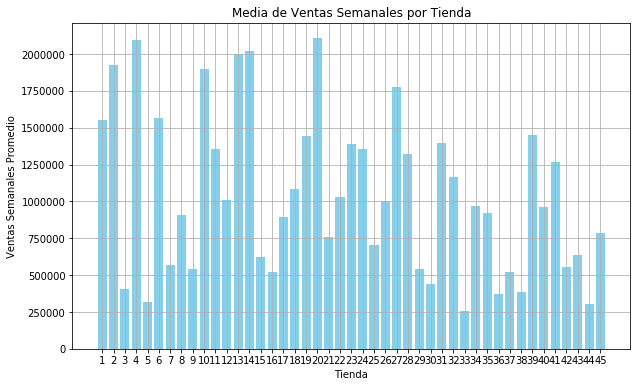

In [58]:
#Agrupar las ventas semanales por tienda y calcular la media de ventas semanales
media_ventas_tienda = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

num_tiendas = df['Store'].nunique()

#Encontrar las tiendas con ventas promedio más altas y más bajas
tienda_max_ventas = media_ventas_tienda.loc[media_ventas_tienda['Weekly_Sales'].idxmax()]
tienda_min_ventas = media_ventas_tienda.loc[media_ventas_tienda['Weekly_Sales'].idxmin()]

print(f"Número de tiendas: {num_tiendas}")
print(f"Tienda con ventas promedio más altas: {tienda_max_ventas['Store']} con {tienda_max_ventas['Weekly_Sales']}")
print(f"Tienda con ventas promedio más bajas: {tienda_min_ventas['Store']} con {tienda_min_ventas['Weekly_Sales']}")

plt.figure(figsize=(10, 6))
plt.bar(media_ventas_tienda['Store'], media_ventas_tienda['Weekly_Sales'], color='skyblue')
plt.title('Media de Ventas Semanales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Semanales Promedio')
plt.xticks(media_ventas_tienda['Store'])  # Para mostrar cada número de tienda en el eje X
plt.grid(True)

# Mostrar el gráfico
plt.show()


c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

c:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



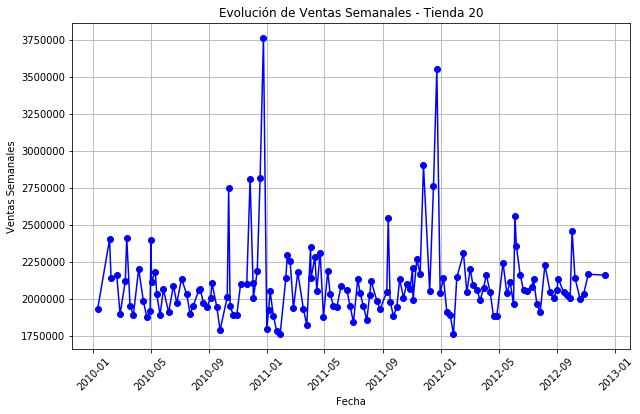

La tienda con más ventas totales es la Tienda 20.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# Convertir la columna 'Date' en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

ventas_totales_tienda = df.groupby('Store')['Weekly_Sales'].sum()
tienda_mayor_ventas = ventas_totales_tienda.idxmax()

#  los datos para la tienda con más ventas totales
df_tienda = df[df['Store'] == tienda_mayor_ventas]

#-datos por fecha
df_tienda = df_tienda.sort_values('Date')

# evolución de las ventas semanales (graphic)
plt.figure(figsize=(10, 6))
plt.plot(df_tienda['Date'], df_tienda['Weekly_Sales'], marker='o', linestyle='-', color='b')
plt.title(f'Evolución de Ventas Semanales - Tienda {tienda_mayor_ventas}')
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización

plt.show()

# 6. Resumen de la tienda con más ventas totales
print(f"La tienda con más ventas totales es la Tienda {tienda_mayor_ventas}.")


# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

Matriz de Correlación:
              Fuel_Price  Unemployment  Weekly_Sales
Fuel_Price      1.000000     -0.034762      0.009586
Unemployment   -0.034762      1.000000     -0.106148
Weekly_Sales    0.009586     -0.106148      1.000000


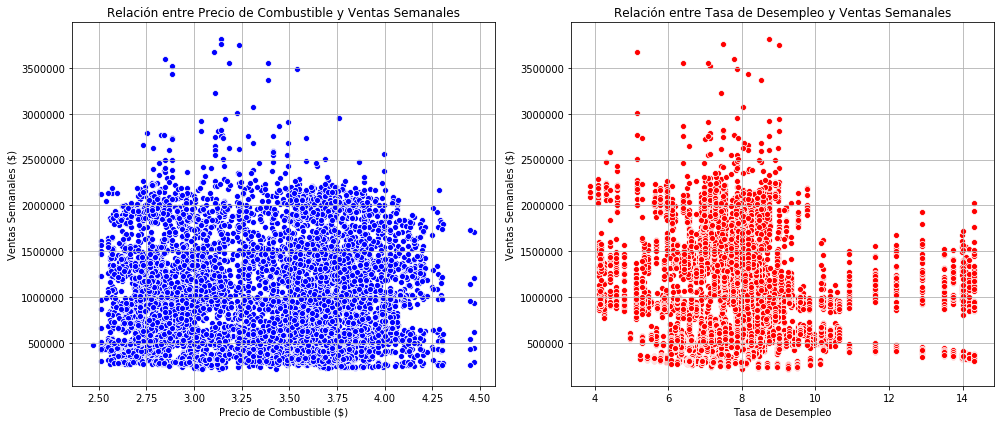

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calcular la correlación entre las variables
correlation_matrix = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr()
print("Matriz de Correlación:")
print(correlation_matrix)

# 3. Generar gráficos de dispersión
plt.figure(figsize=(14, 6))

# Gráfico de dispersión: Fuel Price vs Weekly Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', color='blue')
plt.title('Relación entre Precio de Combustible y Ventas Semanales')
plt.xlabel('Precio de Combustible ($)')
plt.ylabel('Ventas Semanales ($)')
plt.grid(True)

# Gráfico de dispersión: Unemployment vs Weekly Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', color='red')
plt.title('Relación entre Tasa de Desempleo y Ventas Semanales')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('Ventas Semanales ($)')
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show() 


c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [61]:
import pandas as pd
from scipy import stats

ventas_promedio_festivas = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
ventas_promedio_no_festivas = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# 3. Calcular la diferencia promedio de ventas
diferencia_promedio = ventas_promedio_festivas - ventas_promedio_no_festivas

# 4. Realizar una prueba t de Student para comparar las dos medias
t_stat, p_value = stats.ttest_ind(
    df[df['Holiday_Flag'] == 1]['Weekly_Sales'],
    df[df['Holiday_Flag'] == 0]['Weekly_Sales']
)

# Resultados
print(f"Ventas promedio en semanas festivas: {ventas_promedio_festivas:.2f}")
print(f"Ventas promedio en semanas no festivas: {ventas_promedio_no_festivas:.2f}")
print(f"Diferencia promedio de ventas: {diferencia_promedio:.2f}")
print(f"Estadístico t: {t_stat:.2f}, Valor p: {p_value:.4f}")

# Interpretación de la prueba t
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La diferencia es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa.")


Ventas promedio en semanas festivas: 1122887.89
Ventas promedio en semanas no festivas: 1041310.38
Diferencia promedio de ventas: 81577.51
Estadístico t: 2.96, Valor p: 0.0031
La diferencia es estadísticamente significativa.


In [62]:

# Boxplot
fig = go.Figure()

fig.add_trace(
    go.Box(
        x = df[df['Holiday_Flag'] == 1]['Weekly_Sales'],
        marker_color = "gold",
        name = "Ventas Promedio Festivas",
        boxpoints='all',
        boxmean=True
    )
)

fig.add_trace(
    go.Box(
        x = df[df['Holiday_Flag'] == 0]['Weekly_Sales'],
        marker_color = "mediumseagreen",
        name = "Venta Promedio no Festivas",
        boxpoints='all',
        boxmean=True
    )
)

fig.update_layout(title = "Distribución de Ventas", yaxis_title = "")

fig.show()

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [63]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [68]:
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce')
df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce')
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Date']=df['Date'].apply(lambda x: x.toordinal())



c:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [81]:
def modelo_predictivo (X, df_Walmart, df_modelos):
    y = df_Walmart['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

    lm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("lm", LinearRegression()),
    ])

    lm = lm.fit(X_train, y_train)

    print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))
    y_pred = lm.predict(X_test)

    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

    #df_aux = pd.DataFrame(data=(X.columns, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)), columns=df_modelos.columns)


    #df_modelos=pd.concat([df_modelos, df_aux], ignore_index=True)

    return (X.columns, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))


In [82]:
df_mp=pd.DataFrame(columns=['Modelo', 'RSquared', 'MSE'])

mp1=modelo_predictivo(df[['Store', 'Date', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']], df, df_mp)
mp2=modelo_predictivo(df[['Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']], df, mp1)
mp3=modelo_predictivo(df[['CPI', 'Unemployment']], df, mp2)
mp4=modelo_predictivo(df[['Fuel_Price', 'CPI']], df, mp3)
mp5=modelo_predictivo(df[['Holiday_Flag','Unemployment']], df, mp4)



Variance explanation R^2 = 0.14
Mean squared error: 266788403191.85
Variance explanation R^2 = 0.03
Mean squared error: 305242675524.87
Variance explanation R^2 = 0.02
Mean squared error: 306765786492.70
Variance explanation R^2 = 0.01
Mean squared error: 313357839456.85
Variance explanation R^2 = 0.01
Mean squared error: 309464373349.22


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


A pesar de haber tratado de realizar un dataframe para almacenar los modelos con sus respectivas R^2 y MSE, me daba un error que no he conseguido solucionar.

Con ese datafarme hubiese resultado más sencillo obtener directamente el mejor modelo, pero en cambio lo he obtenido observando los resultados de mis prints.

El mejor modelo es el primero, porque, a pesar de que es cierto que utiliza todas las variables, los otros modelos son muy poco explicativos ya que todos tienen R^2 muy cercanos al 0.

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

Los factores que más influyen en las ventas son:

1. Que la fecha sea festivo, ya que hay una diferencia significativa entre que se haga una compra un día festivo y no festivo
2. Tasa de desempleo y precio de combustible no tienen una relación lineal con las ventas. Es decir, no sirven para predecir las ventas semanales.